# System Preparation 

This notebook serves as notes for reference to getting setup to develop with SUBER.

- [GPU Preparation](#gpu_prep)
- [PyTorch Installation](#torch_install)
- [Pytorch Examples]()
- [Transformers and Tokenizers]()


In [1]:

import torch
print(f"Is Cuda available? {torch.cuda.is_available()}.")  # Should return True
print(f"Torch Cuda Version is {torch.__version__}.")  # Should return '12.1'

import time

Is Cuda available? True.
Torch Cuda Version is 2.4.1+cu118.


In [2]:
if torch.cuda.is_available():
    print("CUDA is available! PyTorch can use the GPU")


CUDA is available! PyTorch can use the GPU


In [3]:
print("Current GPU Device:", torch.cuda.get_device_name())

Current GPU Device: NVIDIA GeForce RTX 3060


In [4]:
import torch

# Check PyTorch version
print("PyTorch version:", torch.__version__)

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available! PyTorch can use the GPU.")
    print("Current GPU Device:", torch.cuda.get_device_name(0))
    print("Number of GPUs available:", torch.cuda.device_count())
    print("Current CUDA version:", torch.__version__)
else:
    print("CUDA is NOT available. PyTorch is using the CPU.")


PyTorch version: 2.4.1+cu118
CUDA is available! PyTorch can use the GPU.
Current GPU Device: NVIDIA GeForce RTX 3060
Number of GPUs available: 1
Current CUDA version: 2.4.1+cu118


### Torch Examples

Here are some examples showing that it works.

In [5]:
import torch
import time

# Define the size of the tensors
size = 10000

# Create two large random tensors for CPU
tensor1_cpu = torch.randn(size, size)
tensor2_cpu = torch.randn(size, size)

# Perform matrix multiplication on the CPU and time it
start_time = time.time()
result_cpu = torch.matmul(tensor1_cpu, tensor2_cpu)
end_time = time.time()

print(f"Matrix multiplication on CPU took: {end_time - start_time:.4f} seconds")
print(f"Result tensor size on CPU: {result_cpu.size()}")

# Check if CUDA is available and perform the same test on the GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    
    # Create two large random tensors for GPU
    tensor1_gpu = tensor1_cpu.to(device)
    tensor2_gpu = tensor2_cpu.to(device)

    # Perform matrix multiplication on the GPU and time it
    torch.cuda.synchronize()  # Ensure all CUDA operations are finished
    start_time = time.time()
    result_gpu = torch.matmul(tensor1_gpu, tensor2_gpu)
    torch.cuda.synchronize()  # Ensure the GPU has finished the computation
    end_time = time.time()

    print(f"Matrix multiplication on GPU took: {end_time - start_time:.4f} seconds")
    print(f"Result tensor size on GPU: {result_gpu.size()}")
else:
    print("CUDA is not available on this system.")


Matrix multiplication on CPU took: 3.9345 seconds
Result tensor size on CPU: torch.Size([10000, 10000])
Matrix multiplication on GPU took: 0.3529 seconds
Result tensor size on GPU: torch.Size([10000, 10000])


## Stable Baselines 3 


In [6]:
import os
# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppresses INFO, WARNING, and ERROR messages

import stable_baselines3
import stable_baselines3
print(stable_baselines3.__version__)

2.5.0


### SB3 Example

Note, it takes many iteraitons and the proper algorithm to get good results; this just shows it working.  

In [7]:
import gymnasium as gym
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
from IPython import display
import time

# Create the CartPole-v1 environment with the "rgb_array" render mode
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Create the PPO model (you can replace PPO with other algorithms if you want)
model = PPO("MlpPolicy", env, verbose=1)

# Train the agent for 10,000 steps
model.learn(total_timesteps=10000)

# Test the trained agent and render in the notebook
obs, info = env.reset()

# Set up the plot for dynamic updates
#plt.ion()  # Turn on interactive mode for matplotlib
#fig, ax = plt.subplots()

for _ in range(1000):
    action, _states = model.predict(obs)
    obs, reward, done, truncated, info = env.step(action)


    if done or truncated:
        obs, info = env.reset()

env.close()


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/app/sb3/lib/python3.10/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.6     |
|    ep_rew_mean     | 21.6     |
| time/              |          |
|    fps             | 422      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25.9        |
|    ep_rew_mean          | 25.9        |
| time/                   |             |
|    fps                  | 350         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007898092 |
|    clip_fraction        | 0.0919      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00067     |
|    learning_rate        | 0.

## Tensorflow example

Does Tensorflow work as well?

In [8]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# List available devices
print("Available devices:")
for device in tf.config.list_physical_devices():
    print(device)

# Check if a GPU is detected
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and TensorFlow is using it.")
else:
    print("GPU is NOT available. TensorFlow is using the CPU.")


TensorFlow version: 2.15.1
Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
GPU is available and TensorFlow is using it.


## Example using MNIST dataset

Num GPUs Available:  1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Using GPU: /device:GPU:0
11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5


I0000 00:00:1739722699.844074     359 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 18s 7ms/step - loss: 0.1432 - accuracy: 0.9561 - val_loss: 0.0425 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0479 - accuracy: 0.9854 - val_loss: 0.0367 - val_accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0326 - accuracy: 0.9901 - val_loss: 0.0307 - val_accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0258 - val_accuracy: 0.9913
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0307 - val_accuracy: 0.9909
313/313 - 1s - loss: 0.0307 - accuracy: 0.9909 - 1s/epoch - 5ms/step
Test Accuracy: 0.99


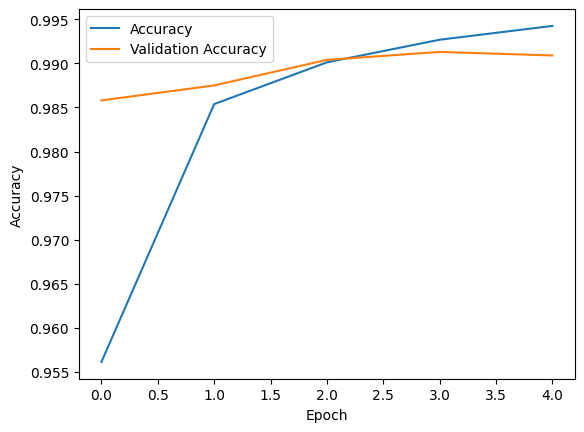

1/1 [==============================] - 0s 373ms/step


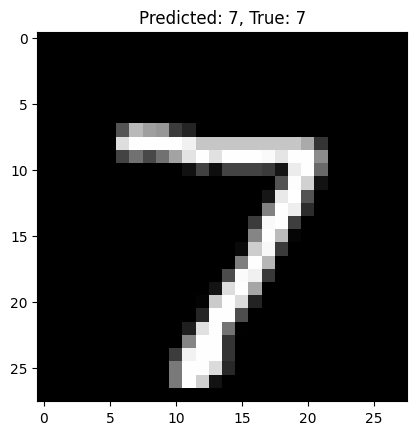

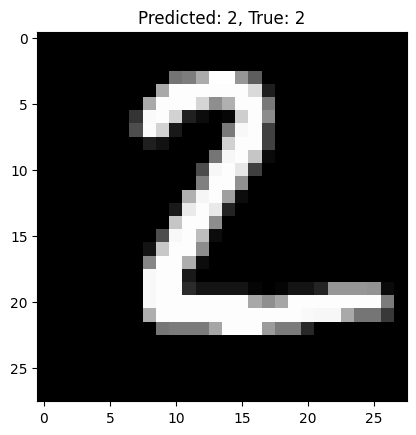

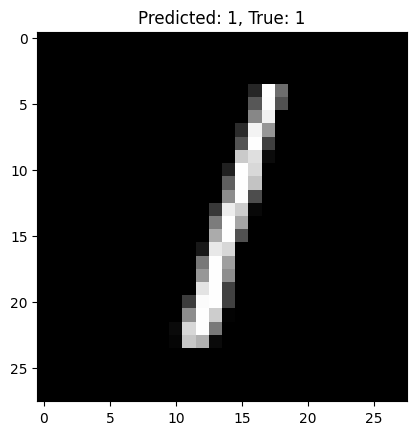

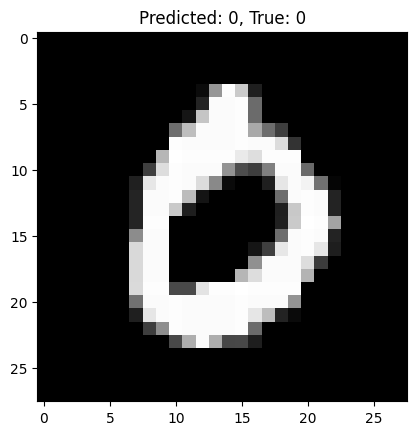

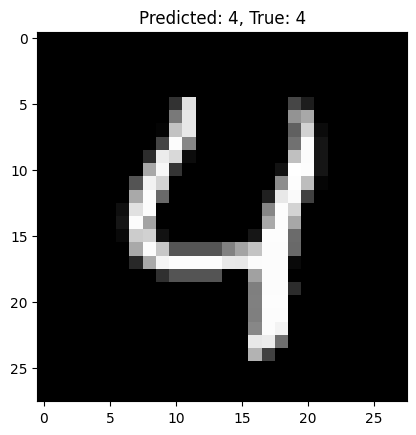

In [9]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Check if TensorFlow is using GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.test.is_gpu_available():
    print("Using GPU:", tf.test.gpu_device_name())
else:
    print("Using CPU. No GPU detected.")

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to scale between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension to the data
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Build a simple neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {tf.argmax(predictions[i]).numpy()}, True: {y_test[i]}")
    plt.show()


### Transformer and Tokenizer Example

In [10]:
import tqdm
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',quiet=True)
model = BertModel.from_pretrained('bert-base-uncased')

# Sample text
text = "Transformers are amazing for NLP tasks."

# Tokenize the input text
inputs = tokenizer(text, return_tensors="pt")

# Get the tokenized input IDs
input_ids = inputs["input_ids"]

# Decode the token IDs back to text
decoded_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)

# Print original text, tokenized input, and decoded text
print("Original Text:", text)
print("Tokenized Input IDs:", input_ids)
print("Decoded Text:", decoded_text)


/app/sb3/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Original Text: Transformers are amazing for NLP tasks.
Tokenized Input IDs: tensor([[  101, 19081,  2024,  6429,  2005, 17953,  2361,  8518,  1012,   102]])
Decoded Text: transformers are amazing for nlp tasks.


## Sentence Transformers


### Sentence Transformers Example

In [11]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode a list of sentences
sentences = ["Transformers are amazing for NLP tasks.", "Sentence embeddings are useful."]
embeddings = model.encode(sentences)

# Print the sentence embeddings
print(embeddings)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/app/sb3/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[-9.13389623e-02 -2.08391678e-02  3.78195494e-02 -1.00276563e-02
  -2.18986571e-02  6.64146105e-03 -4.42283079e-02  4.97135669e-02
   2.80648377e-02  1.45602552e-02  2.62471847e-02  8.02668780e-02
   4.97584604e-03  8.78880545e-02  4.61270176e-02  3.79768983e-02
   3.22095938e-02  1.52603192e-02 -4.78855856e-02 -8.71268734e-02
   1.09329350e-01  8.22059587e-02  1.47923548e-02 -5.11702932e-02
   5.15240319e-02  6.55859411e-02 -5.36913276e-02 -4.96964008e-02
   3.65458690e-02 -9.47062206e-03 -4.13956009e-02  5.72569109e-02
  -6.83492124e-02  5.84685020e-02 -6.26849830e-02  7.58528113e-02
   1.44350193e-02  1.83785912e-02  1.41708059e-02 -5.39688915e-02
  -3.47521119e-02 -1.90681964e-02  1.80511549e-02 -2.25276779e-02
   4.55971025e-02 -3.47322710e-02 -2.73608882e-02 -1.98490210e-02
  -8.14894855e-04 -2.79270560e-02 -3.95562686e-02 -5.84855042e-02
   5.34983538e-02  1.18243895e-01 -1.34977922e-02  2.81568505e-02
   8.00178666e-03 -5.52489348e-02  1.07748285e-02 -8.26784745e-02
  -7.50691

## Setup Summary -- 

More notes can be added here but Pytorch, and Stable Baselines 3 are the two main modules.  Extras required from both will come up but should not be a huge issue.  